In [59]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12, 8)

In [2]:
fl1 = "data_files/train.csv"
fl2 = "data_files/test.csv"

In [3]:
train_df = pd.read_csv(fl1, header=0)
test_df = pd.read_csv(fl2, header=0)

In [4]:
print(train_df.shape)
print(test_df.shape)

(188318, 132)
(125546, 131)


In [61]:
tr_nulls = train_df.isnull().sum().to_frame().transpose()
te_nulls = test_df.isnull().sum().to_frame().transpose()

In [65]:
# for c in te_nulls.columns:
#     print("{}: {}".format(c, tr_nulls[c][0]))

In [5]:
train_df.corr()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
id,1.000000,0.002130,0.000783,0.000816,0.002578,0.000775,0.001426,0.002209,0.005534,0.001870,0.002582,0.001075,0.000889,0.000442,-0.004924,-0.001122
cont1,0.002130,1.000000,-0.085180,-0.445431,0.367549,-0.025230,0.758315,0.367384,0.361163,0.929912,0.808551,0.596090,0.614225,0.534850,0.056688,-0.010237
cont2,0.000783,-0.085180,1.000000,0.455861,0.038693,0.191427,0.015864,0.048187,0.137468,-0.032729,0.063526,0.116824,0.106250,0.023335,-0.045584,0.141528
cont3,0.000816,-0.445431,0.455861,1.000000,-0.341633,0.089417,-0.349278,0.097516,-0.185432,-0.417054,-0.325562,0.025271,0.006111,-0.418203,-0.039592,0.111053
cont4,0.002578,0.367549,0.038693,-0.341633,1.000000,0.163748,0.220932,-0.115064,0.528740,0.328961,0.283294,0.120927,0.130453,0.179342,0.017445,-0.035831
cont5,0.000775,-0.025230,0.191427,0.089417,0.163748,1.000000,-0.149810,-0.249344,0.009015,-0.088202,-0.064967,-0.151548,-0.148217,-0.082915,-0.021638,-0.011355
cont6,0.001426,0.758315,0.015864,-0.349278,0.220932,-0.149810,1.000000,0.658918,0.437437,0.797544,0.883351,0.773745,0.785144,0.815091,0.042178,0.040967
cont7,0.002209,0.367384,0.048187,0.097516,-0.115064,-0.249344,0.658918,1.000000,0.142042,0.384343,0.492621,0.747108,0.742712,0.288395,0.022286,0.119799
cont8,0.005534,0.361163,0.137468,-0.185432,0.528740,0.009015,0.437437,0.142042,1.000000,0.452658,0.336588,0.302381,0.315904,0.476402,0.043539,0.030508
cont9,0.001870,0.929912,-0.032729,-0.417054,0.328961,-0.088202,0.797544,0.384343,0.452658,1.000000,0.785697,0.608000,0.626656,0.642028,0.074154,0.014456


In [6]:
# scatter_matrix(train_df, alpha=0.2, diagonal='kde')

In [7]:
print(train_df['loss'].min())
print(train_df['loss'].max())

0.67
121012.25


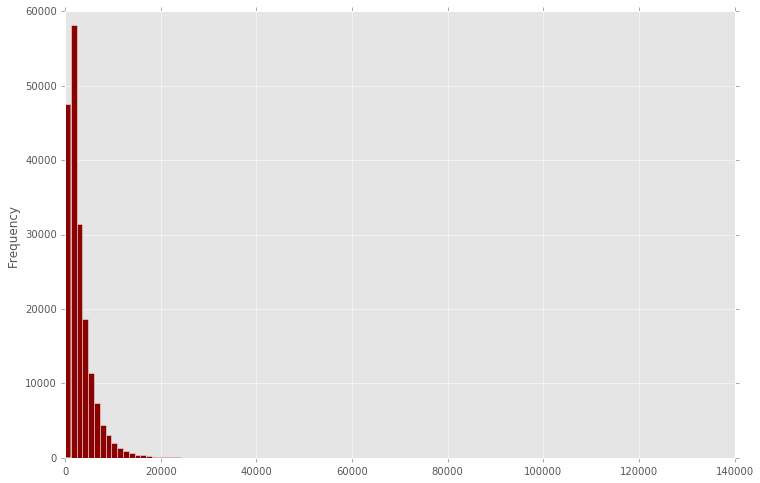

In [8]:
train_df['loss'].plot.hist(bins=100, color="darkred")

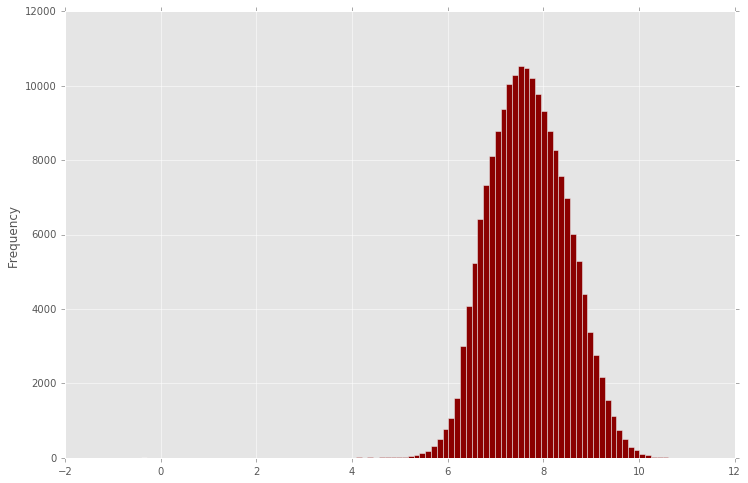

In [9]:
np.log(train_df['loss']).plot.hist(bins=100, color="darkred")

In [10]:
train_df2 = train_df.copy()

In [11]:
train_df2['log_loss'] = train_df['loss'].map(lambda x: np.log(x))

In [12]:
train_df2.corr()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,log_loss
id,1.000000,0.002130,0.000783,0.000816,0.002578,0.000775,0.001426,0.002209,0.005534,0.001870,0.002582,0.001075,0.000889,0.000442,-0.004924,-0.001122,-0.000022
cont1,0.002130,1.000000,-0.085180,-0.445431,0.367549,-0.025230,0.758315,0.367384,0.361163,0.929912,0.808551,0.596090,0.614225,0.534850,0.056688,-0.010237,-0.007325
cont2,0.000783,-0.085180,1.000000,0.455861,0.038693,0.191427,0.015864,0.048187,0.137468,-0.032729,0.063526,0.116824,0.106250,0.023335,-0.045584,0.141528,0.104627
cont3,0.000816,-0.445431,0.455861,1.000000,-0.341633,0.089417,-0.349278,0.097516,-0.185432,-0.417054,-0.325562,0.025271,0.006111,-0.418203,-0.039592,0.111053,0.081518
cont4,0.002578,0.367549,0.038693,-0.341633,1.000000,0.163748,0.220932,-0.115064,0.528740,0.328961,0.283294,0.120927,0.130453,0.179342,0.017445,-0.035831,-0.027521
cont5,0.000775,-0.025230,0.191427,0.089417,0.163748,1.000000,-0.149810,-0.249344,0.009015,-0.088202,-0.064967,-0.151548,-0.148217,-0.082915,-0.021638,-0.011355,-0.014962
cont6,0.001426,0.758315,0.015864,-0.349278,0.220932,-0.149810,1.000000,0.658918,0.437437,0.797544,0.883351,0.773745,0.785144,0.815091,0.042178,0.040967,0.031509
cont7,0.002209,0.367384,0.048187,0.097516,-0.115064,-0.249344,0.658918,1.000000,0.142042,0.384343,0.492621,0.747108,0.742712,0.288395,0.022286,0.119799,0.085073
cont8,0.005534,0.361163,0.137468,-0.185432,0.528740,0.009015,0.437437,0.142042,1.000000,0.452658,0.336588,0.302381,0.315904,0.476402,0.043539,0.030508,0.032028
cont9,0.001870,0.929912,-0.032729,-0.417054,0.328961,-0.088202,0.797544,0.384343,0.452658,1.000000,0.785697,0.608000,0.626656,0.642028,0.074154,0.014456,0.017422


In [13]:
cont_vars = ["cont{}".format(i) for i in range(1, 15)]

In [14]:
X_cl = np.asarray(train_df2[cont_vars])

In [17]:
km = KMeans(n_clusters=7)

In [18]:
cont_labels = km.fit_predict(X_cl)

In [19]:
pca = PCA()

In [20]:
pca.fit(X_cl)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

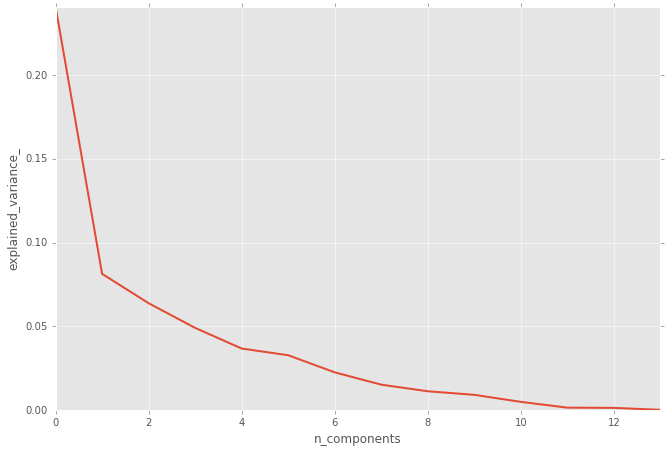

In [22]:
plt.figure(1)
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

In [25]:
cat_vars = ["cat{}".format(i) for i in range(1, 117)]

In [26]:
train_df[cat_vars].head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116
0,A,B,A,B,A,A,A,A,B,A,...,J,G,BU,BC,C,AS,S,A,O,LB
1,A,B,A,A,A,A,A,A,B,B,...,K,K,BI,CQ,A,AV,BM,A,O,DP
2,A,B,A,A,B,A,A,A,B,B,...,F,A,AB,DK,A,C,AF,A,I,GK
3,B,B,A,B,A,A,A,A,B,A,...,K,K,BI,CS,C,N,AE,A,O,DJ
4,A,B,A,B,A,A,A,A,B,B,...,G,B,H,C,C,Y,BM,A,K,CK


In [60]:
# for c in cat_vars:
#     print("{}: {}".format(c, len(train_df[c].unique())))

In [29]:
train_df.shape

(188318, 132)

In [30]:
num_cols_w_dums = 131

for c in cat_vars:
    num_cols_w_dums += len(train_df[c].unique()) - 1

In [31]:
num_cols_w_dums

1154

In [32]:
train_df3 = train_df.copy()

In [33]:
train_df3 = pd.get_dummies(train_df3, columns=cat_vars, drop_first=True)

In [34]:
train_df3.shape

(188318, 1039)

In [35]:
train_df3.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,cat116_P,cat116_Q,cat116_R,cat116_S,cat116_T,cat116_U,cat116_V,cat116_W,cat116_X,cat116_Y
0,1,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
pca2 = PCA()

In [37]:
pca2.fit(np.asarray(train_df3.drop(['id', 'loss'], axis=1)))

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

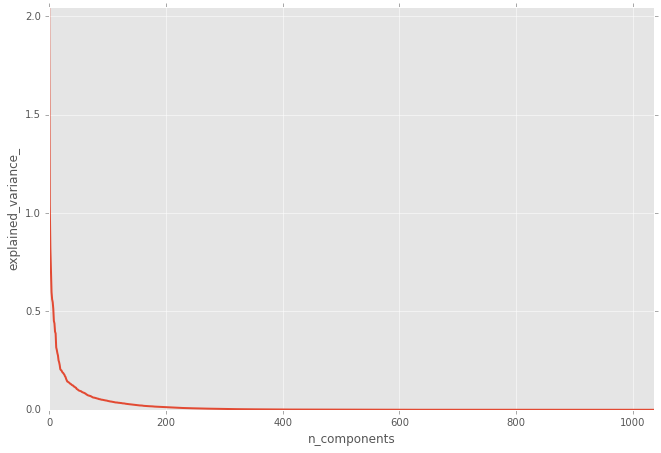

In [39]:
plt.figure(1)
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca2.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

In [40]:
pca_200_comps = PCA(n_components=200)

In [41]:
X_pca_200 = pca_200_comps.fit_transform(np.asarray(train_df3.drop(['id', 'loss'], axis=1)))

In [42]:
X_pca_200.shape

(188318, 200)

In [44]:
y_pca_200 = np.asarray(train_df3['loss']).reshape(-1, 1)

In [46]:
lm1 = LinearRegression()

In [47]:
lm1.fit(X_pca_200, y_pca_200)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
lm1.score(X_pca_200, y_pca_200)

0.48660878636242222

In [51]:
ls = Lasso()

In [53]:
cross_val_score(ls, np.asarray(train_df3.drop(['id', 'loss'], axis=1)), np.asarray(train_df3['loss']).reshape(-1, 1), 
                scoring="neg_mean_absolute_error")

array([-1301.46973484, -1300.21181102, -1301.26548536])

In [56]:
rf = RandomForestRegressor(n_estimators=20, max_depth=10)

In [57]:
# cross_val_score(rf, np.asarray(train_df3.drop(['id', 'loss'], axis=1)), np.asarray(train_df3['loss']).reshape(-1, 1), 
#                 scoring="neg_mean_absolute_error")

array([-1318.28639655, -1318.34673296, -1325.12360738])

In [66]:
l1_mixes = np.arange(0.1, 1.0, 0.1)

In [68]:
mx_dict = dict()

for l in l1_mixes:
    en = ElasticNet(alpha=0.1, l1_ratio=l)
    scs = cross_val_score(en, np.asarray(train_df3.drop(['id', 'loss'], axis=1)), 
                          np.asarray(train_df3['loss']).reshape(-1, 1), scoring="neg_mean_absolute_error")
    mx_dict[str(l)] = np.absolute(np.mean(scs))

In [69]:
mx_dict

{'0.1': 1343.0202755406526,
 '0.2': 1338.3123773428736,
 '0.3': 1333.5081821294805,
 '0.4': 1328.6056862606695,
 '0.5': 1323.6300510020847,
 '0.6': 1318.5885525651422,
 '0.7': 1313.5072235605082,
 '0.8': 1308.37147433269,
 '0.9': 1303.3703064721988}